# What is the Best Indicators to Explain Rent?
### Group member：
Chen Sun #906092466， Zile Zhan #206092634， Ziyu Zeng #306092539， Jennifer Qin #306083747

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from RegscorePy import mallow
import itertools
from BorutaShap import BorutaShap
import statsmodels.api as sm
from matplotlib.ticker import ScalarFormatter
from statsmodels.graphics.regressionplots import plot_ceres_residuals

In [2]:
df=pd.read_csv('train.csv', encoding = 'utf-8')

In [5]:
df.head()

,bedroom,bathrooms,area,furnishing,avalable_for,floor_number,facing,gate_community,corner_pro,parking,...,no_room,pooja_room,study_room,others,servant_room,store_room,brok_amt,deposit_amt,mnt_amt,rent
0,2.0,2.0,1050.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,9.903488
1,2.0,2.0,760.0,0.0,0.0,5.0,0.0,1.0,1.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0.0,9.546813
2,3.0,3.0,1122.0,0.5,0.0,1.0,7.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,23000.0,60000.0,1.0,10.043206
3,1.0,1.0,628.0,1.0,1.0,3.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,40000.0,0.0,9.472705
4,2.0,2.0,668.0,0.5,2.0,6.0,4.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,0.0,8.922658


## Boruta Algorithm analysis

Based on our Boruta Algorithm analysis, the top 10 predictors are bedroom, deposit_amt, area, brok_amt, furnishing, facing, noticeDur, floor_number, mnt_amt,parking. Moreover, according to the level of importance, we choose all of the above predicators for our model.

  0%|          | 0/50 [00:00<?, ?it/s]

7 attributes confirmed important: ['brok_amt', 'furnishing', 'bathrooms', 'propertyage', 'bedroom', 'deposit_amt', 'area']
19 attributes confirmed unimportant: ['parking', 'powerbackup', 'others', 'corner_pro', 'lightbill', 'petfacility', 'facing', 'no_room', 'gate_community', 'aggDur', 'avalable_for', 'noticeDur', 'floor_number', 'wheelchairadption', 'servant_room', 'store_room', 'study_room', 'mnt_amt', 'pooja_room']
0 tentative attributes remains: []


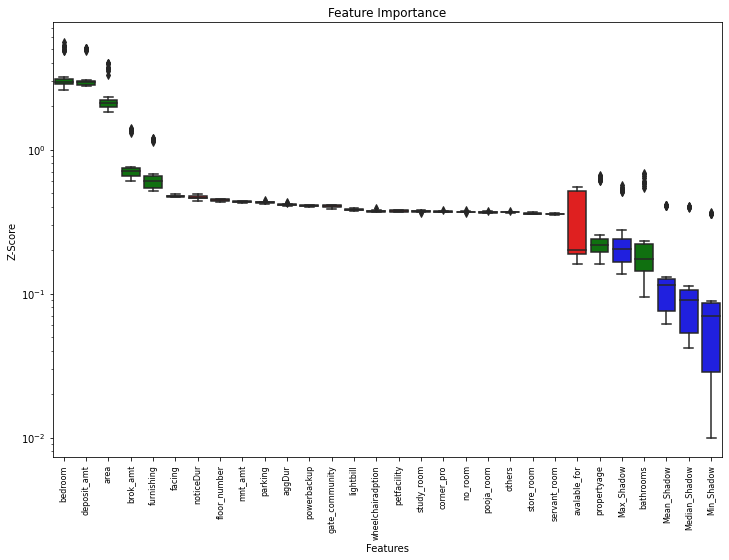

In [7]:
from BorutaShap import BorutaShap
boruta_data = df.copy()
df1 = df.sample(n = 2000).reset_index()
del df1['index']
df1
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
Feature_Selector = BorutaShap(importance_measure='shap', classification=False)
Feature_Selector.fit(X=x, y=y, n_trials=50, random_state=0)
Feature_Selector.plot(which_features='all')

After using Boruta Algorithm shown above, we choose top 7 variables: bedroom, deposit_amt, brok_amt, area, bathrooms, furnishing, propertyage as predictors to construct the further model. The details of each predictor are showing below including Density plot, Q-Q Plot, Boxplot, and Scattered Plot respectively, also the Correlation Plots among these variables.

## Descriptive Analysis

We have done the transformation to the following variables in the previous file ('project2-eda') we submitted.

-square root transformation to 'area'

-log transformation to 'rent, deposit_amt, brok_amt'

In [9]:
df = pd.read_csv('train5.csv')
del df['Unnamed: 0']

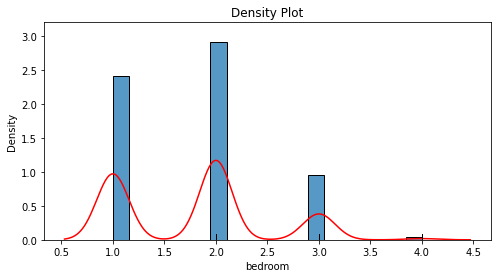

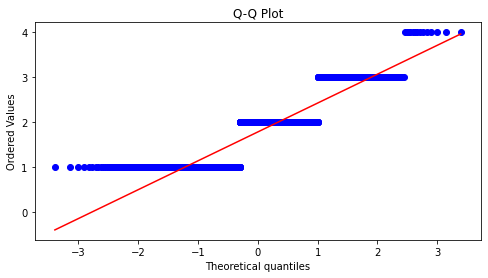

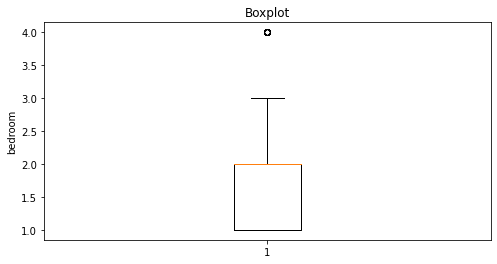

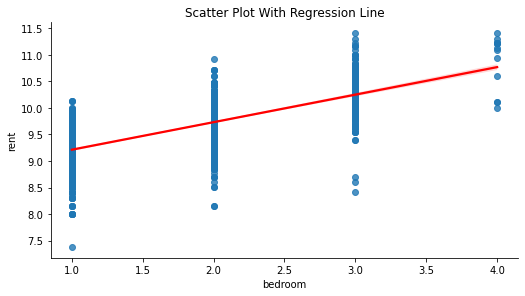

In [15]:
#BEDROOM

#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['bedroom'],stat = 'density')
sns.kdeplot(df['bedroom'], color = 'red')
sns.rugplot(df['bedroom'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['bedroom'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['bedroom'])
plt.ylabel('bedroom')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='bedroom',y='rent',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

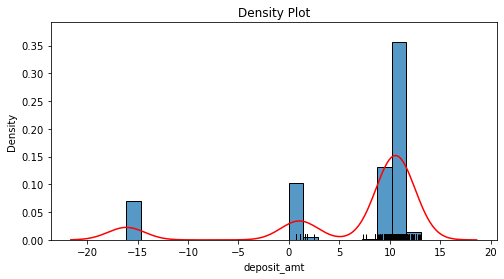

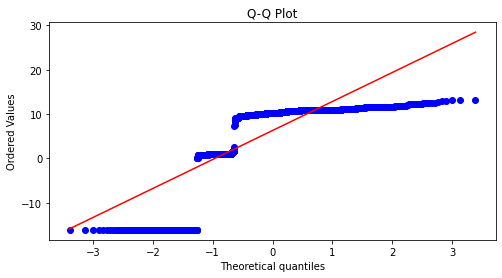

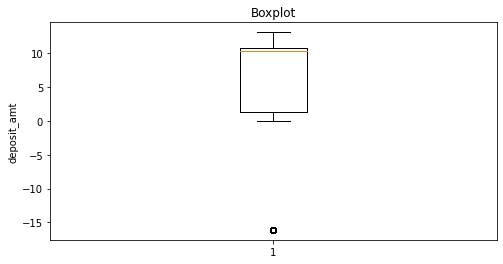

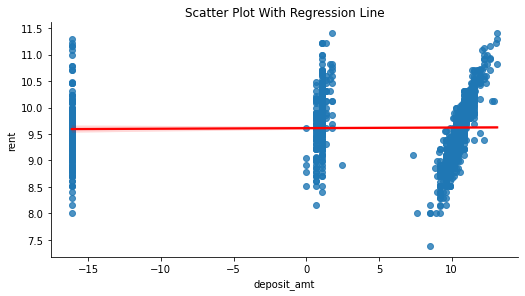

In [14]:
#DEPOSIT_AMT

#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['deposit_amt'],stat = 'density')
sns.kdeplot(df['deposit_amt'], color = 'red')
sns.rugplot(df['deposit_amt'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['deposit_amt'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['deposit_amt'])
plt.ylabel('deposit_amt')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='deposit_amt',y='rent',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

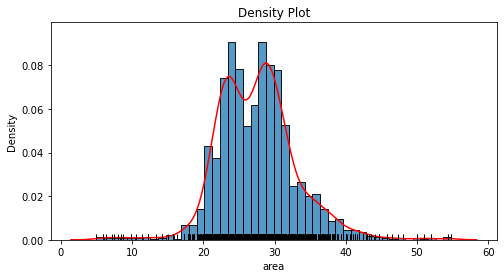

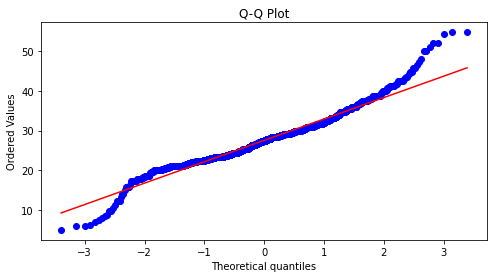

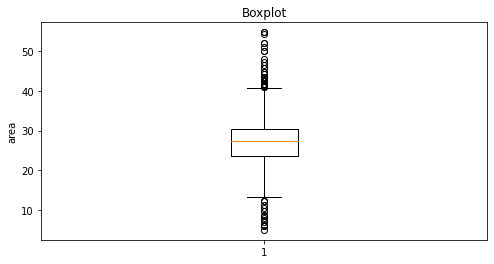

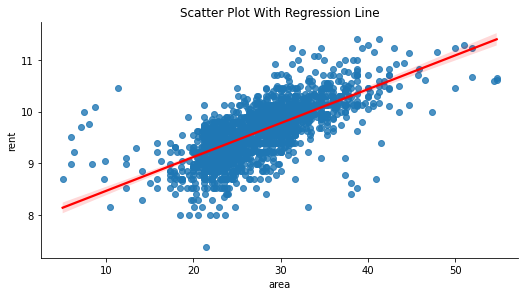

In [17]:
# AREA

#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['area'],stat = 'density')
sns.kdeplot(df['area'], color = 'red')
sns.rugplot(df['area'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['area'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['area'])
plt.ylabel('area')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='area',y='rent',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

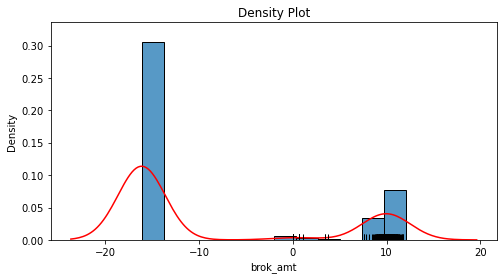

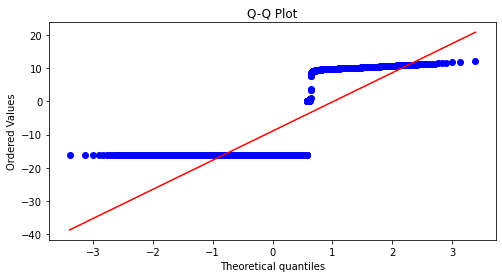

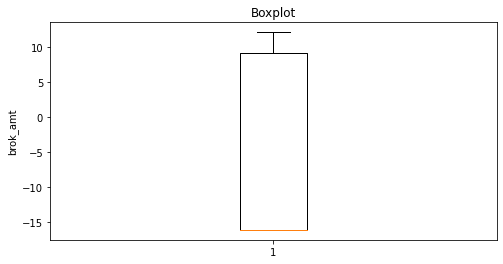

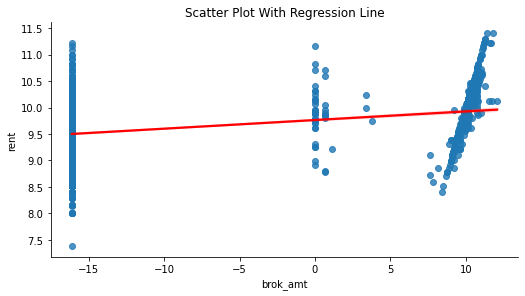

In [18]:
#BROK_AMT

#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['brok_amt'],stat = 'density')
sns.kdeplot(df['brok_amt'], color = 'red')
sns.rugplot(df['brok_amt'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['brok_amt'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['brok_amt'])
plt.ylabel('brok_amt')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='brok_amt',y='rent',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

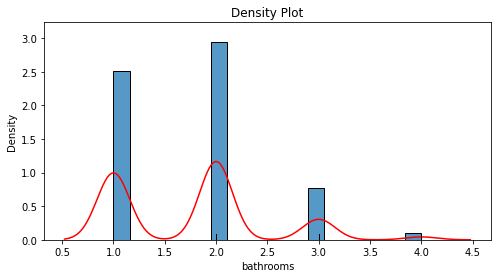

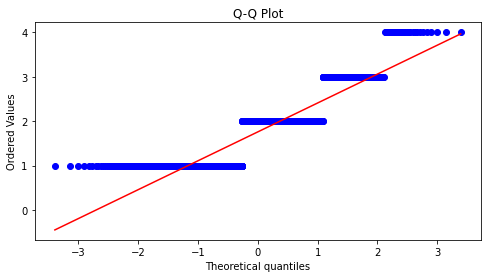

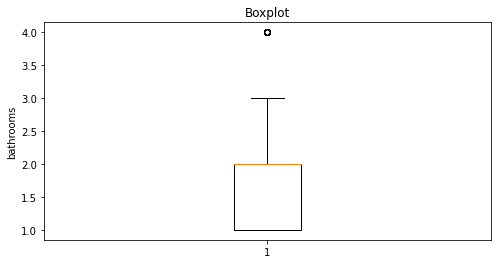

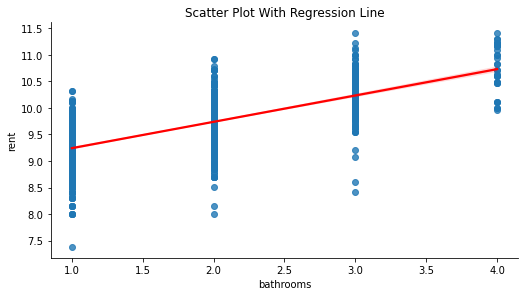

In [19]:
#BATHROOM

#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['bathrooms'],stat = 'density')
sns.kdeplot(df['bathrooms'], color = 'red')
sns.rugplot(df['bathrooms'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['bathrooms'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['bathrooms'])
plt.ylabel('bathrooms')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='bathrooms',y='rent',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

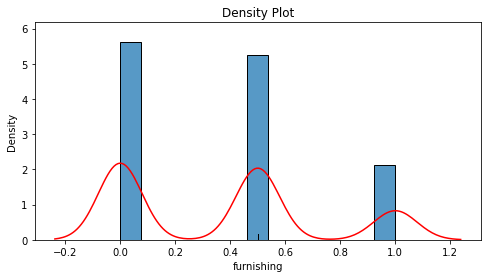

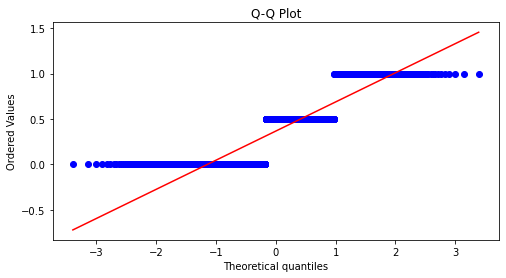

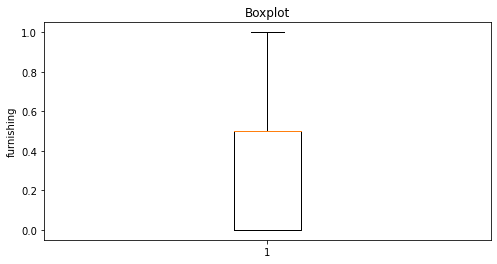

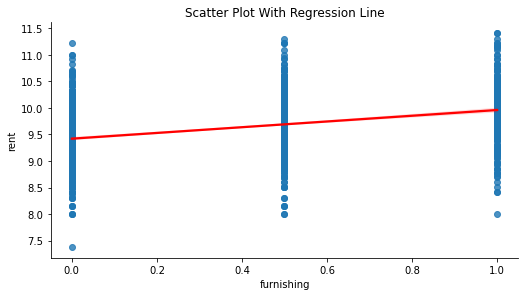

In [20]:
#FURNISHING

#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['furnishing'],stat = 'density')
sns.kdeplot(df['furnishing'], color = 'red')
sns.rugplot(df['furnishing'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['furnishing'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['furnishing'])
plt.ylabel('furnishing')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='furnishing',y='rent',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

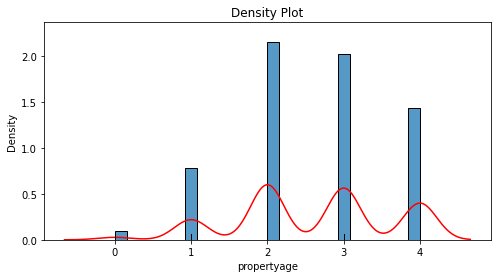

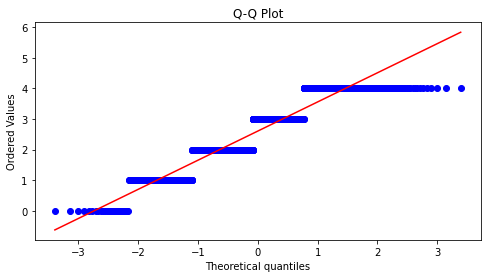

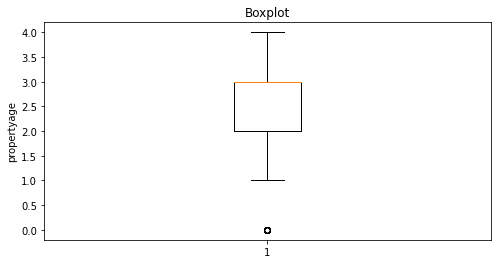

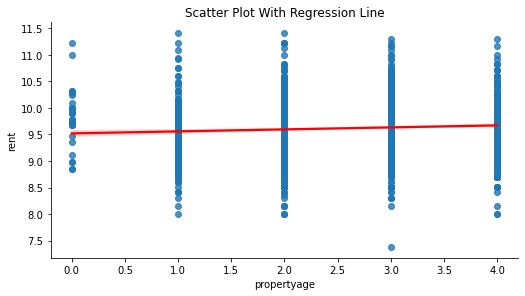

In [21]:
#PROPERTYAGE

#Density Plot
plt.figure(figsize = (8,4))
sns.histplot(df['propertyage'],stat = 'density')
sns.kdeplot(df['propertyage'], color = 'red')
sns.rugplot(df['propertyage'], color = 'black')
plt.title('Density Plot')
plt.show()

#Q-Q Plot
plt.figure(figsize = (8,4))
stats.probplot(df['propertyage'], dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

#Boxplot
plt.figure(figsize = (8,4))
plt.boxplot(df['propertyage'])
plt.ylabel('propertyage')
plt.title('Boxplot')
plt.show()

#Scatter plot with regression line
sns.lmplot(data=df,x='propertyage',y='rent',line_kws={'color':'red'},height=4,aspect=1.85)
plt.title('Scatter Plot With Regression Line')
plt.show()

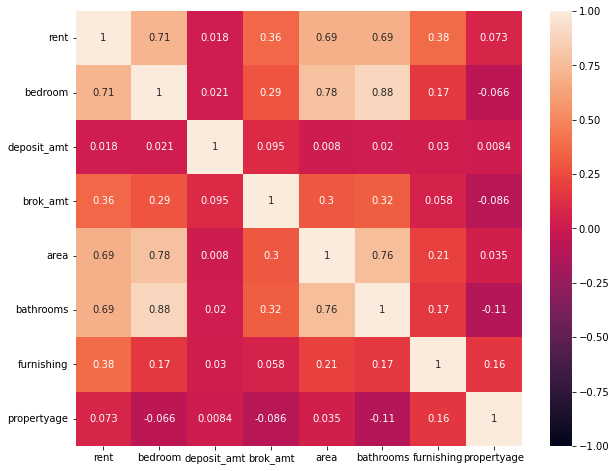

In [22]:
#CORRELATION PLOT

plt.figure(figsize = (10,8))
heatmap = sns.heatmap(df[['rent','bedroom','deposit_amt','brok_amt',
                           'area','bathrooms','furnishing','propertyage']].corr(), 
                      vmin=-1, vmax=1, annot=True)
plt.show()

## Model Building

In [23]:
# test for Multicollinearity
import patsy as pt
import statsmodels.stats.outliers_influence as smo
y, X = pt.dmatrices('rent ~ bedroom+deposit_amt+brok_amt+area+bathrooms+furnishing+propertyage', data = df,
                   return_type = 'dataframe')

k = X.shape[1]

# create an empty matrix to store results
VIF1 = np.empty(k)

# Loop for each regressor (+ intercept)
for i in range(k):
    # calculate the VIF for each
    VIF1[i] = smo.variance_inflation_factor(X.values, i)

print('VIF for model1:', VIF1)

VIF for model1: [41.11433843  5.21840762  1.01096242  1.14353907  2.83801103  5.00303716
  1.07450088  1.0794827 ]


In [24]:
y2, X2 = pt.dmatrices('rent ~ bedroom+deposit_amt+brok_amt+area+furnishing+propertyage', data = df,
                   return_type = 'dataframe')

k2 = X2.shape[1]

# create an empty matrix to store results
VIF2 = np.empty(k2)

# Loop for each regressor (+ intercept)
for i in range(k2):
    # calculate the VIF for each
    VIF2[i] = smo.variance_inflation_factor(X2.values, i)

print('VIF for model2:', VIF2)

VIF for model2: [41.07624503  2.61677736  1.01094743  1.12920175  2.67617032  1.07328379
  1.05923593]


After having 7 preferred variables, we firstly test the Multicollinearity. By observing VIF of these variables, we decided to drop 'bathrooms' with high VIF-value and low t-statistics. After droping this variable, we retest the Multicollinearity of new model and found that the VIFs becoming better.

In [25]:
results8 = smf.ols('rent ~ bedroom+deposit_amt+brok_amt+area+furnishing+propertyage', df).fit()
results8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     574.6
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:37:37   Log-Likelihood:                -526.12
No. Observations:                2000   AIC:                             1066.
Df Residuals:                    1993   BIC:                             1105.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2449      0.045    182.448      0.000       8.156       8.334
bedroom         0.3206      0.016     20.130      0.000       0.289       0.352
deposit_amt    -0.0010      0.001     -1.133      0.257      -0.003       0.001
brok_amt        0.0069      0.001     10.586      0.000       0.006       0.008
area            0.0237      0.002     11.267      0.000       0.020       0.028
furnishing      0.3298      0.020     16.345      0.000       0.290       0.369
propertyage     0.0362      0.007      5.028      0.000       0.022       0.050
==============================================================================
Omnibus:                      337.309   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1117.279
Skew:                          -0.831   Prob(JB):                    2.43e-243
Kurtosis:                       6.263   Cond. No.                         196.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

According to the regression result of new model above, we found that 'deposit_amt' is not significant, so we dropped this variable from the model.

In [27]:
# Test for model misspecification
results = smf.ols('rent ~ bedroom+brok_amt+area+furnishing+propertyage', df).fit()
reset_out = smo.reset_ramsey(res = results, degree = 3)
reset_out

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=1.4690924211297869, p=0.2303834843430593, df_denom=1.99e+03, df_num=2>

According to misspecification test result, it is clearly shown that we have large p-value so that this model do not need interaction term.

In [29]:
# Test for heteroskedasticity

y_model, model = pt.dmatrices('rent ~ bedroom+brok_amt+area+furnishing+propertyage', data = df,
                   return_type = 'dataframe')

sm.stats.diagnostic.het_white(results.resid, model)

(89.06058502000613,
 1.0815402216569976e-10,
 4.611629661645695,
 5.925495423701455e-11)

In [31]:
df['resid'] =  results.resid**2

# estimate weights
w_est = smf.ols('np.log(resid) ~ bedroom+brok_amt+area+furnishing+propertyage', data = df).fit()

vari = np.exp(w_est.fittedvalues) #estimated variances
w = 1/vari**2

fgls =smf.wls('rent ~ bedroom+brok_amt+area+furnishing+propertyage', df, weights = w).fit()

print(fgls.summary())

results_model_modify = smf.ols('rent ~ bedroom+brok_amt+area+furnishing+propertyage', 
                                df).fit(cov_type = 'HC0')
sm.stats.diagnostic.het_white(results_model_modify.resid, model)

                            WLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.714
Model:                            WLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     993.3
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:44:08   Log-Likelihood:                -571.11
No. Observations:                2000   AIC:                             1154.
Df Residuals:                    1994   BIC:                             1188.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2751      0.036    230.840      

(89.06058502000613,
 1.0815402216569976e-10,
 4.611629661645695,
 5.925495423701455e-11)

According to WHITE TEST, we found heteroskedasticity, so we performed FGLS and HC0 to correct it. However, due to the specification of discrete sample, these two methods can not fix it.

### MODEL SELECTION

In [32]:
# Mallow’s CP

subdat = df[['rent','bedroom','brok_amt','area','furnishing','propertyage']].copy()
model = smf.ols(formula='rent ~bedroom+brok_amt+area+furnishing+propertyage', data=df)
results = model.fit()
y = df['rent']
y_pred = results.fittedvalues

# You need to run each sub regression individually, and get the score for each subset
# Using subset size =1
storage_cp = pd.DataFrame(columns = ["Variables", "CP"])
k = 6 # number of parameters in orginal model (includes y-intercept)

for L in range (1, len(subdat.columns[1:])+1):
    for subset in itertools.combinations(subdat.columns[1:], L):
        formula1 = 'rent~'+'+'.join(subset)
        mr_sub = smf.ols(formula=formula1, data=df)
        mr_sub_fit = mr_sub.fit()
        y_sub=mr_sub_fit.fittedvalues
        p = len(subset)+1 # number of parameters in the subset model (includes y-intercept)
        cp = mallow.mallow(y, y_pred,y_sub, k, p)
        storage_cp = storage_cp.append({'Variables': subset, 'CP': cp}, ignore_index = True)
print(storage_cp.sort_values(by = "CP"))

                                            Variables           CP
30  (bedroom, brok_amt, area, furnishing, property...          6.0
25              (bedroom, brok_amt, area, furnishing)    29.099132
28           (bedroom, area, furnishing, propertyage)   114.771124
18                        (bedroom, area, furnishing)   129.402203
27       (bedroom, brok_amt, furnishing, propertyage)   131.851804
16                    (bedroom, brok_amt, furnishing)   172.746469
26             (bedroom, brok_amt, area, propertyage)   270.332618
20                 (bedroom, furnishing, propertyage)   279.968494
7                               (bedroom, furnishing)   310.136475
15                          (bedroom, brok_amt, area)    327.33428
19                       (bedroom, area, propertyage)   381.645389
29          (brok_amt, area, furnishing, propertyage)   408.497444
21                       (brok_amt, area, furnishing)   410.926006
6                                     (bedroom, area)   425.20

In [33]:
print(storage_cp.sort_values(by = "CP").iloc[0,0])
print(storage_cp.sort_values(by = "CP").iloc[1,0])
print(storage_cp.sort_values(by = "CP").iloc[2,0])

('bedroom', 'brok_amt', 'area', 'furnishing', 'propertyage')
('bedroom', 'brok_amt', 'area', 'furnishing')
('bedroom', 'area', 'furnishing', 'propertyage')


To get the best model, we calculated all possible sub-models using Mallow’s CP and chose the top 3 best models to perform further tests.

In [34]:
# REGRESSION COMPARISON
results_model1 = smf.ols('rent ~ bedroom+brok_amt+area+furnishing+propertyage', df).fit()
results_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     689.2
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:52:42   Log-Likelihood:                -526.76
No. Observations:                2000   AIC:                             1066.
Df Residuals:                    1994   BIC:                             1099.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2373      0.045    184.316      0.000       8.150       8.325
bedroom         0.3203      0.016     20.112      0.000       0.289       0.352
brok_amt        0.0068      0.001     10.525      0.000       0.006       0.008
area            0.0238      0.002     11.307      0.000       0.020       0.028
furnishing      0.3292      0.020     16.320      0.000       0.290       0.369
propertyage     0.0361      0.007      5.010      0.000       0.022       0.050
==============================================================================
Omnibus:                      334.389   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1110.104
Skew:                          -0.823   Prob(JB):                    8.79e-242
Kurtosis:                       6.257   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
results_model2 = smf.ols('rent ~ bedroom+brok_amt+area+furnishing', df).fit()
results_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     845.0
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:52:49   Log-Likelihood:                -539.27
No. Observations:                2000   AIC:                             1089.
Df Residuals:                    1995   BIC:                             1117.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3054      0.043    193.920      0.000       8.221       8.389
bedroom        0.3087      0.016     19.474      0.000       0.278       0.340
brok_amt       0.0065      0.001     10.054      0.000       0.005       0.008
area           0.0252      0.002     11.996      0.000       0.021       0.029
furnishing     0.3452      0.020     17.224      0.000       0.306       0.384
==============================================================================
Omnibus:                      333.338   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1084.164
Skew:                          -0.827   Prob(JB):                    3.77e-236
Kurtosis:                       6.205   Cond. No.                         180.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
results_model3 = smf.ols('rent ~ bedroom+area+furnishing+propertyage', df).fit()
results_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     790.3
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:53:01   Log-Likelihood:                -580.83
No. Observations:                2000   AIC:                             1172.
Df Residuals:                    1995   BIC:                             1200.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.0854      0.043    186.108      0.000       8.000       8.171
bedroom         0.3324      0.016     20.370      0.000       0.300       0.364
area            0.0269      0.002     12.589      0.000       0.023       0.031
furnishing      0.3308      0.021     15.964      0.000       0.290       0.371
propertyage     0.0293      0.007      3.970      0.000       0.015       0.044
==============================================================================
Omnibus:                      358.979   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1229.522
Skew:                          -0.873   Prob(JB):                    1.03e-267
Kurtosis:                       6.421   Cond. No.                         172.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By comparing R-squared, AIC, BIC and JB-Test, we concluded that model 1 is the best model on the current stage.

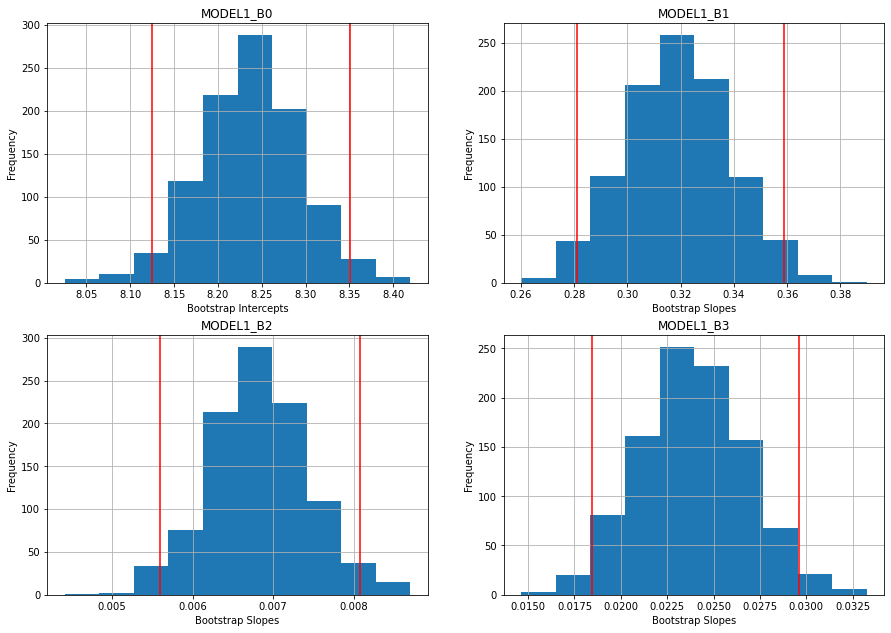

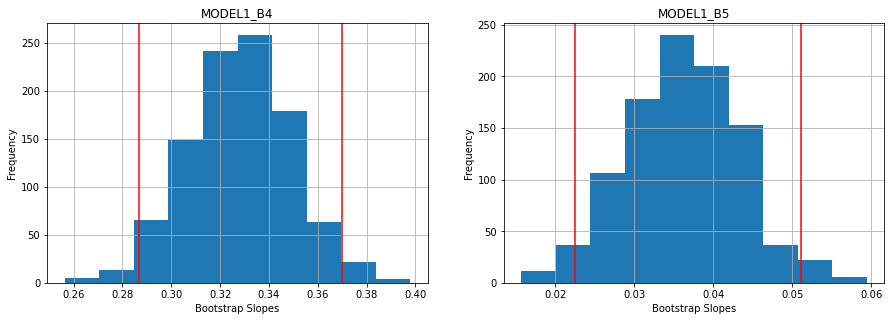

In [38]:
# Evaluate the robustness of coefficient estimates by bootstrapping 3 different models

# MODEL 1
mod1_coefs = pd.DataFrame(columns = ["mod1_B0","mod1_B1","mod1_B2","mod1_B3","mod1_B4","mod1_B5"])

for i in range(1000):
    
    sample = df.sample(df.shape[0] ,replace = True)
    
    results = smf.ols('rent ~ bedroom+brok_amt+area+furnishing+propertyage', 
                      sample).fit()
    
    mod1_b0,mod1_b1,mod1_b2,mod1_b3,mod1_b4,mod1_b5 = results.params
    
    mod1_coefs = mod1_coefs.append(
        {"mod1_B0":mod1_b0, "mod1_B1":mod1_b1,"mod1_B2":mod1_b2,"mod1_B3":mod1_b3,
         "mod1_B4":mod1_b4,"mod1_B5":mod1_b5}, ignore_index = True)

mod1_B0_u = mod1_coefs['mod1_B0'].quantile(0.975)
mod1_B1_u = mod1_coefs['mod1_B1'].quantile(0.975)
mod1_B2_u = mod1_coefs['mod1_B2'].quantile(0.975)
mod1_B3_u = mod1_coefs['mod1_B3'].quantile(0.975)
mod1_B4_u = mod1_coefs['mod1_B4'].quantile(0.975)
mod1_B5_u = mod1_coefs['mod1_B5'].quantile(0.975)

mod1_B0_l = mod1_coefs['mod1_B0'].quantile(0.025)
mod1_B1_l = mod1_coefs['mod1_B1'].quantile(0.025)
mod1_B2_l = mod1_coefs['mod1_B2'].quantile(0.025)
mod1_B3_l = mod1_coefs['mod1_B3'].quantile(0.025)
mod1_B4_l = mod1_coefs['mod1_B4'].quantile(0.025)
mod1_B5_l = mod1_coefs['mod1_B5'].quantile(0.025)

fig=plt.figure(figsize=(15,22))
ax=fig.add_subplot(4,2,1) 
mod1_coefs.mod1_B0.hist()
plt.xlabel("Bootstrap Intercepts")
plt.ylabel("Frequency")
plt.title('MODEL1_B0')
plt.axvline(mod1_B0_u, color = "red")
plt.axvline(mod1_B0_l, color = "red")

ax=fig.add_subplot(4,2,2) 
mod1_coefs.mod1_B1.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('MODEL1_B1')
plt.axvline(mod1_B1_u, color = "red")
plt.axvline(mod1_B1_l, color = "red")

ax=fig.add_subplot(4,2,3) 
mod1_coefs.mod1_B2.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('MODEL1_B2')
plt.axvline(mod1_B2_u, color = "red")
plt.axvline(mod1_B2_l, color = "red")

ax=fig.add_subplot(4,2,4) 
mod1_coefs.mod1_B3.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('MODEL1_B3')
plt.axvline(mod1_B3_u, color = "red")
plt.axvline(mod1_B3_l, color = "red")

fig1=plt.figure(figsize=(15,22))
ax=fig1.add_subplot(4,2,1) 
mod1_coefs.mod1_B4.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('MODEL1_B4')
plt.axvline(mod1_B4_u, color = "red")
plt.axvline(mod1_B4_l, color = "red")

ax=fig1.add_subplot(4,2,2) 
mod1_coefs.mod1_B5.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('MODEL1_B5')
plt.axvline(mod1_B5_u, color = "red")
plt.axvline(mod1_B5_l, color = "red")

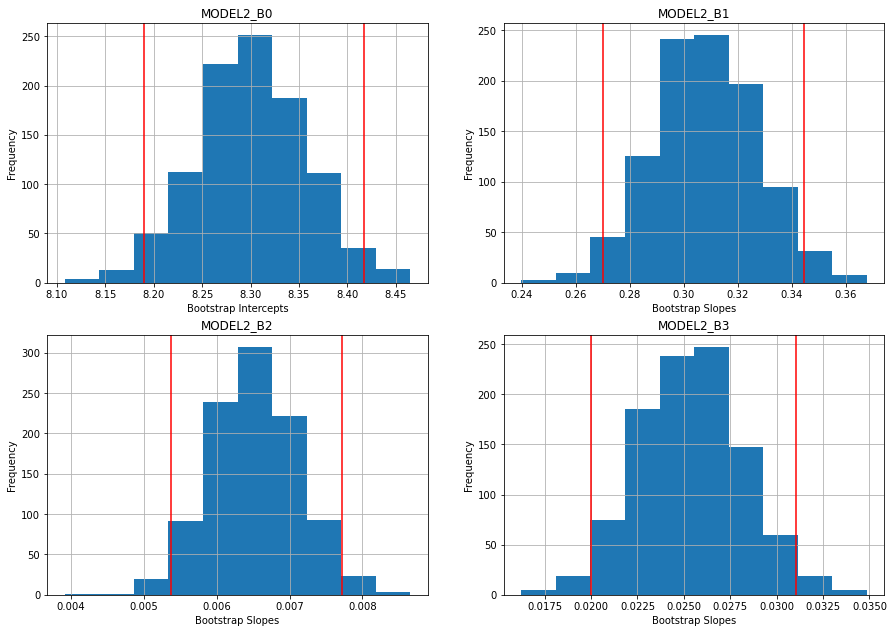

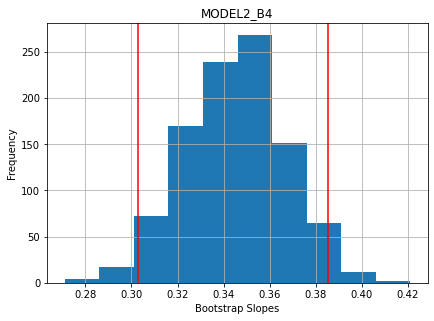

In [39]:
# MODEL 2
mod2_coefs = pd.DataFrame(columns = ["mod2_B0","mod2_B1","mod2_B2","mod2_B3","mod2_B4"])

for i in range(1000):
    
    sample = df.sample(df.shape[0] ,replace = True)
    
    results = smf.ols('rent ~ bedroom+brok_amt+area+furnishing', 
                      sample).fit()
    
    mod2_b0,mod2_b1,mod2_b2,mod2_b3,mod2_b4 = results.params
    
    mod2_coefs = mod2_coefs.append(
        {"mod2_B0":mod2_b0, "mod2_B1":mod2_b1,"mod2_B2":mod2_b2,"mod2_B3":mod2_b3,
         "mod2_B4":mod2_b4}, ignore_index = True)

mod2_B0_u = mod2_coefs['mod2_B0'].quantile(0.975)
mod2_B1_u = mod2_coefs['mod2_B1'].quantile(0.975)
mod2_B2_u = mod2_coefs['mod2_B2'].quantile(0.975)
mod2_B3_u = mod2_coefs['mod2_B3'].quantile(0.975)
mod2_B4_u = mod2_coefs['mod2_B4'].quantile(0.975)

mod2_B0_l = mod2_coefs['mod2_B0'].quantile(0.025)
mod2_B1_l = mod2_coefs['mod2_B1'].quantile(0.025)
mod2_B2_l = mod2_coefs['mod2_B2'].quantile(0.025)
mod2_B3_l = mod2_coefs['mod2_B3'].quantile(0.025)
mod2_B4_l = mod2_coefs['mod2_B4'].quantile(0.025)

fig=plt.figure(figsize=(15,22))
ax=fig.add_subplot(4,2,1) 
mod2_coefs.mod2_B0.hist()
plt.xlabel("Bootstrap Intercepts")
plt.ylabel("Frequency")
plt.title('MODEL2_B0')
plt.axvline(mod2_B0_u, color = "red")
plt.axvline(mod2_B0_l, color = "red")

ax=fig.add_subplot(4,2,2) 
mod2_coefs.mod2_B1.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('MODEL2_B1')
plt.axvline(mod2_B1_u, color = "red")
plt.axvline(mod2_B1_l, color = "red")

ax=fig.add_subplot(4,2,3) 
mod2_coefs.mod2_B2.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('MODEL2_B2')
plt.axvline(mod2_B2_u, color = "red")
plt.axvline(mod2_B2_l, color = "red")

ax=fig.add_subplot(4,2,4) 
mod2_coefs.mod2_B3.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('MODEL2_B3')
plt.axvline(mod2_B3_u, color = "red")
plt.axvline(mod2_B3_l, color = "red")

fig1=plt.figure(figsize=(15,22))
ax=fig1.add_subplot(4,2,1) 
mod2_coefs.mod2_B4.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('MODEL2_B4')
plt.axvline(mod2_B4_u, color = "red")
plt.axvline(mod2_B4_l, color = "red")

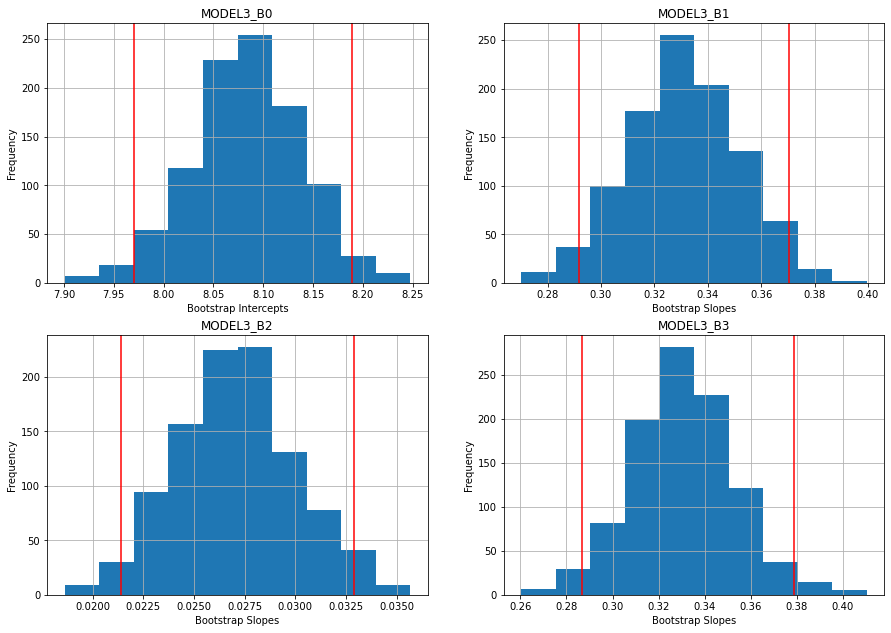

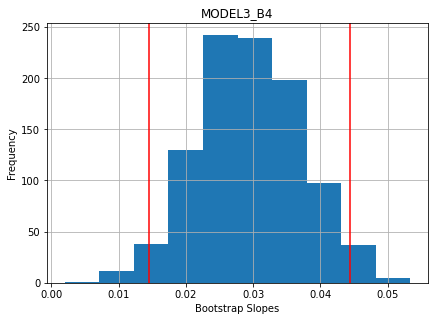

In [40]:
# MODEL 3
mod3_coefs = pd.DataFrame(columns = ["mod3_B0","mod3_B1","mod3_B2","mod3_B3","mod3_B4"])

for i in range(1000):
    
    sample = df.sample(df.shape[0] ,replace = True)
    
    results = smf.ols('rent ~ bedroom+area+furnishing+propertyage', 
                      sample).fit()
    
    mod3_b0,mod3_b1,mod3_b2,mod3_b3,mod3_b4 = results.params
    
    mod3_coefs = mod3_coefs.append(
        {"mod3_B0":mod3_b0, "mod3_B1":mod3_b1,"mod3_B2":mod3_b2,"mod3_B3":mod3_b3,
         "mod3_B4":mod3_b4}, ignore_index = True)

mod3_B0_u = mod3_coefs['mod3_B0'].quantile(0.975)
mod3_B1_u = mod3_coefs['mod3_B1'].quantile(0.975)
mod3_B2_u = mod3_coefs['mod3_B2'].quantile(0.975)
mod3_B3_u = mod3_coefs['mod3_B3'].quantile(0.975)
mod3_B4_u = mod3_coefs['mod3_B4'].quantile(0.975)

mod3_B0_l = mod3_coefs['mod3_B0'].quantile(0.025)
mod3_B1_l = mod3_coefs['mod3_B1'].quantile(0.025)
mod3_B2_l = mod3_coefs['mod3_B2'].quantile(0.025)
mod3_B3_l = mod3_coefs['mod3_B3'].quantile(0.025)
mod3_B4_l = mod3_coefs['mod3_B4'].quantile(0.025)

fig=plt.figure(figsize=(15,22))
ax=fig.add_subplot(4,2,1) 
mod3_coefs.mod3_B0.hist()
plt.xlabel("Bootstrap Intercepts")
plt.ylabel("Frequency")
plt.title('MODEL3_B0')
plt.axvline(mod3_B0_u, color = "red")
plt.axvline(mod3_B0_l, color = "red")

ax=fig.add_subplot(4,2,2) 
mod3_coefs.mod3_B1.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('MODEL3_B1')
plt.axvline(mod3_B1_u, color = "red")
plt.axvline(mod3_B1_l, color = "red")

ax=fig.add_subplot(4,2,3) 
mod3_coefs.mod3_B2.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('MODEL3_B2')
plt.axvline(mod3_B2_u, color = "red")
plt.axvline(mod3_B2_l, color = "red")

ax=fig.add_subplot(4,2,4) 
mod3_coefs.mod3_B3.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('MODEL3_B3')
plt.axvline(mod3_B3_u, color = "red")
plt.axvline(mod3_B3_l, color = "red")

fig1=plt.figure(figsize=(15,22))
ax=fig1.add_subplot(4,2,1) 
mod3_coefs.mod3_B4.hist()
plt.xlabel("Bootstrap Slopes")
plt.ylabel("Frequency")
plt.title('MODEL3_B4')
plt.axvline(mod3_B4_u, color = "red")
plt.axvline(mod3_B4_l, color = "red")

By comparing the bootstrapping result of 3 models, they are all robust.

In [41]:
#5-Fold Cross-validation

from sklearn.model_selection import KFold

#MODEL 1
kf = KFold(n_splits = 5)

mod1_mse = []
for train_index, test_index in kf.split(df):
    # train data over training set
    mod1_results = smf.ols('rent ~ bedroom+brok_amt+area+furnishing+propertyage', 
                          df.iloc[train_index]).fit()
    
    # test over last split 
    mod1_s = (((df.iloc[test_index]["rent"]) - mod1_results.predict(df.iloc[test_index]))**2).mean()
    
    # append test metric
    mod1_mse.append(mod1_s)

print(mod1_mse)
print('The average score of MODEL 1 is',np.mean(mod1_mse))

#MODEL 2
kf = KFold(n_splits = 5)

mod2_mse = []
for train_index, test_index in kf.split(df):
    # train data over training set
    mod2_results = smf.ols('rent ~ bedroom+brok_amt+area+furnishing', 
                          df.iloc[train_index]).fit()
    
    # test over last split 
    mod2_s = (((df.iloc[test_index]["rent"]) - mod2_results.predict(df.iloc[test_index]))**2).mean()
    
    # append test metric
    mod2_mse.append(mod2_s)

print(mod2_mse)
print('The average score of MODEL 2 is',np.mean(mod2_mse))

#MODEL 3
kf = KFold(n_splits = 5)

mod3_mse = []
for train_index, test_index in kf.split(df):
    # train data over training set
    mod3_results = smf.ols('rent ~ bedroom+area+furnishing+propertyage', 
                          df.iloc[train_index]).fit()
    
    # test over last split 
    mod3_s = (((df.iloc[test_index]["rent"]) - mod3_results.predict(df.iloc[test_index]))**2).mean()
    
    # append test metric
    mod3_mse.append(mod3_s)

print(mod3_mse)
print('The average score of MODEL 3 is',np.mean(mod3_mse))

[0.10560740194891065, 0.09460183821495574, 0.1131377427869036, 0.09474155125499978, 0.09102508350002009]
The average score of MODEL 1 is 0.09982272354115797
[0.10365670962700028, 0.0964503119120327, 0.11422844183490154, 0.09732207456610519, 0.0927324566853755]
The average score of MODEL 2 is 0.10087799892508305
[0.11385537670116402, 0.09928001124220427, 0.11843905548881985, 0.09889644813532533, 0.09637891959823758]
The average score of MODEL 3 is 0.1053699622331502


In [43]:
# MODEL 1
results_mod1 = smf.ols('rent ~ bedroom+brok_amt+area+furnishing+propertyage', 
                    df.iloc[:int(np.round(len(df))*0.7)]).fit()
    
s_mod1 = (((df.iloc[int(np.round(len(df))*0.7):]["rent"]) 
        - results_mod1.predict(df.iloc[int(np.round(len(df))*0.7):]))**2).mean()

print('When splitting train set and test set with 70% and 30% of model 1, the mse is',s_mod1)

# MODEL 2
results_mod2 = smf.ols('rent ~ bedroom+brok_amt+area+furnishing', 
                    df.iloc[:int(np.round(len(df))*0.7)]).fit()
     
s_mod2 = (((df.iloc[int(np.round(len(df))*0.7):]["rent"]) 
        - results_mod2.predict(df.iloc[int(np.round(len(df))*0.7):]))**2).mean()

print('When splitting train set and test set with 70% and 30% of model 2, the mse is',s_mod2)

# MODEL 3
results_mod3 = smf.ols('rent ~ bedroom+area+furnishing+propertyage', 
                    df.iloc[:int(np.round(len(df))*0.7)]).fit()
     
s_mod3 = (((df.iloc[int(np.round(len(df))*0.7):]["rent"]) 
        - results_mod3.predict(df.iloc[int(np.round(len(df))*0.7):]))**2).mean()

print('When splitting train set and test set with 70% and 30% of model 3, the mse is',s_mod3)

When splitting train set and test set with 70% and 30% of model 1, the mse is 0.08824616911239616
When splitting train set and test set with 70% and 30% of model 2, the mse is 0.09032612396385653
When splitting train set and test set with 70% and 30% of model 3, the mse is 0.09209824558270897


By comparing the MSE-score by 5-fold Cross-validation and by splitting the data into testing and
training sets, and predicting on the testing set, model 1 has the best performance in both method.

#### Overall, we will select model 1 (rent ~ bedroom+brok_amt+area+furnishing+propertyage) as our final model.

### MODEL DESCRIPTION

In [44]:
# Fitted Values vs Studentized Residuals

def spread_level(model, data):
    df_copy = data.copy()
    
    # Get the studentized residuals
    df_copy["Absolute_Studentized_Residuals"] = (np.abs(model.get_influence().resid_studentized))
    df_copy["Fitted_Values"] = (model.fittedvalues)
    
    # run regression to get slope of fitted vs resid, rlm is a robust linear model used by R
    slreg = smf.rlm("np.log(Absolute_Studentized_Residuals) ~ np.log(Fitted_Values)", df_copy).fit()
    slope = slreg.params[1]
    
    # plot values
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.set_title("Fitted Values vs Studentized Residuals")
    sns.regplot(x = "Fitted_Values", y = "Absolute_Studentized_Residuals", data = df_copy, lowess = True, ax = ax)
    ax.plot(df_copy.Fitted_Values.values, np.exp(slreg.fittedvalues).values)
    
    # Set to the logarithmic scale
    ax.set_yscale('log')
    ax.set_xscale('log')
    
    # convert froms scientific notation to scalar notation
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.xaxis.set_major_formatter(ScalarFormatter())
    
    # Resolve overlapping label bug
    ax.minorticks_off()
    
    # Set tick labels automatically
    ax.set_xticks(np.linspace(df_copy["Fitted_Values"].min(),df_copy["Fitted_Values"].max(), 6))
    ax.set_yticks(np.linspace(df_copy["Absolute_Studentized_Residuals"].min(),
                              df_copy["Absolute_Studentized_Residuals"].max(), 6))
    
    ax.grid()
    
    # return a suggested power transform of your y-variable that may correct heteroscedastcity
    # The transform is just one minus the slope of the reegression line of your fitted values vs residuals
    print("Suggested Power Transformation:", 1-slope)

Suggested Power Transformation: 2.3222208875550083


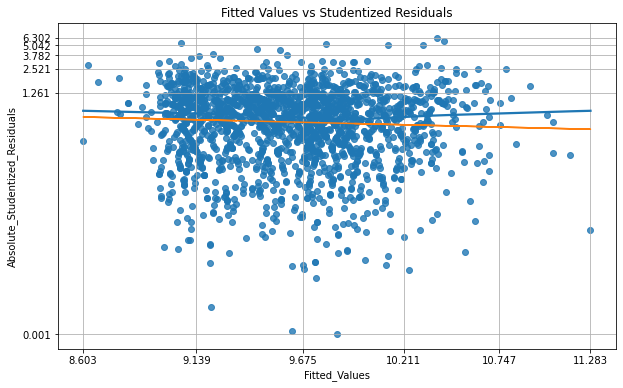

In [46]:
spread_level(results_model1, df)

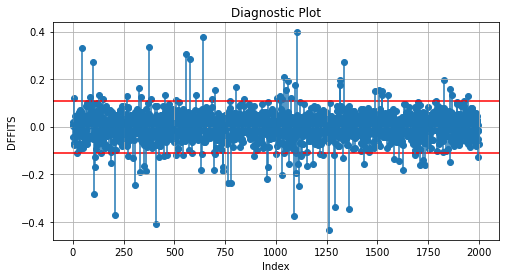

In [47]:
#DFFIT

dffits,threshold = results_model1.get_influence().dffits
plt.figure(figsize = (8,4))
plt.scatter(df.index, dffits)
plt.axhline(threshold,color = 'red')
plt.axhline(-threshold,color = 'red')
plt.vlines(x=df.index,ymin=0,ymax=dffits)
plt.xlabel('Index')
plt.ylabel('DFFITS')
plt.title('Diagnostic Plot')
plt.grid()
plt.show()

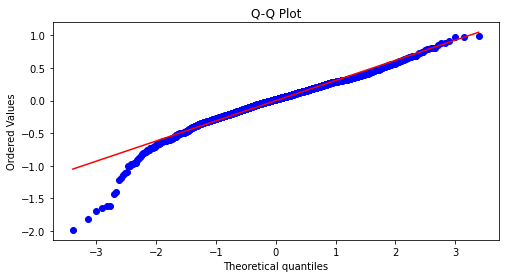

In [48]:
#Q-Q Plot

plt.figure(figsize = (8,4))
stats.probplot(results_model1.resid, dist = 'norm', plot = plt)
plt.title('Q-Q Plot')
plt.show()

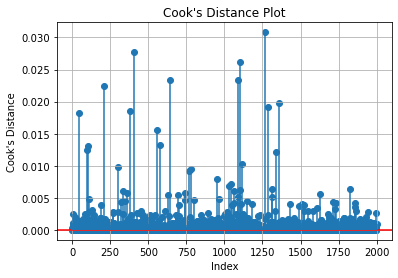

In [49]:
#Cook’s distance Plot

distance = results_model1.get_influence().cooks_distance
plt.scatter(df.index, distance[0])
plt.axhline(0,color='red')
plt.vlines(x = df.index,ymin=0,ymax=distance[0])
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.grid()
plt.show()

In [50]:
# Marginal Effects

def ccpr_plot(model, data, variable):
    df_copy = data.copy()
    
    df_copy["epartial"] = model.resid + model.params[variable]*data[variable]
    
    plt.figure(figsize = (10, 6))
    
    sns.regplot(x = variable, y = "epartial", data =df_copy, lowess = True)
    sns.regplot(x = variable, y = "epartial", data =df_copy)
    
    plt.title("Component + Residuals "+variable)

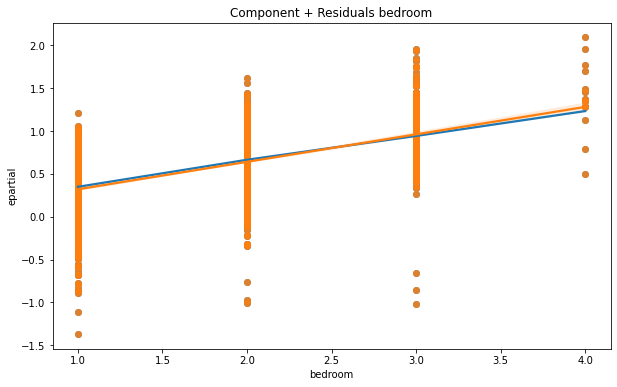

In [51]:
ccpr_plot(results_model1, df, "bedroom")

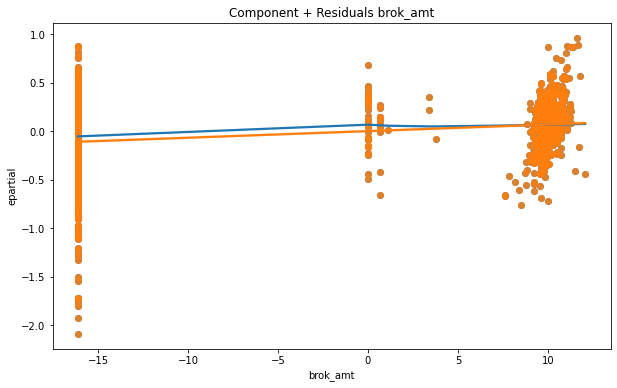

In [52]:
ccpr_plot(results_model1, df, "brok_amt")

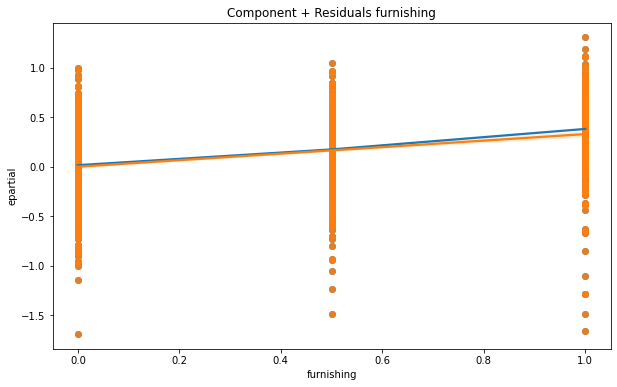

In [53]:
ccpr_plot(results_model1, df, "furnishing")

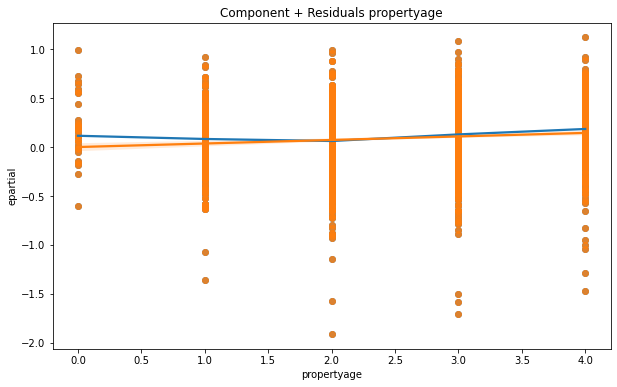

In [54]:
ccpr_plot(results_model1, df, "propertyage")

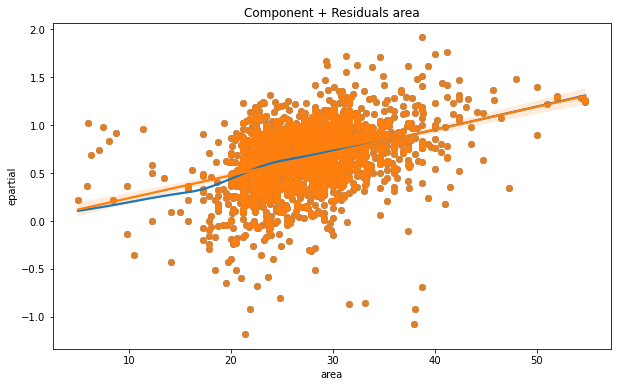

In [55]:
ccpr_plot(results_model1, df, "area")

In [56]:
results_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     689.2
Date:                Mon, 14 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:23:05   Log-Likelihood:                -526.76
No. Observations:                2000   AIC:                             1066.
Df Residuals:                    1994   BIC:                             1099.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2373      0.045    184.316      0.000       8.150       8.325
bedroom         0.3203      0.016     20.112      0.000       0.289       0.352
brok_amt        0.0068      0.001     10.525      0.000       0.006       0.008
area            0.0238      0.002     11.307      0.000       0.020       0.028
furnishing      0.3292      0.020     16.320      0.000       0.290       0.369
propertyage     0.0361      0.007      5.010      0.000       0.022       0.050
==============================================================================
Omnibus:                      334.389   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1110.104
Skew:                          -0.823   Prob(JB):                    8.79e-242
Kurtosis:                       6.257   Cond. No.                         189.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Our model is log(rent) = 8.2373+0.3203bedroom+0.0068log(brok_amt)+0.0238area^0.5+0.3292furnishing+0.0361propertyage, on average, when increased bedroom number by one unit, we estimate rent increased by 32.03%; when increased brok_amt by 1%, we estimate rent increased by 0.0068%; when increased sqrt(area) by one, we estimate rent increased by 2.38%; rent of furnished houses is 32.92% higher than unfurnished ones on average; when increased propertyage by one unit, we estimate rent increased by 3.61%.

### FUTURE DIRECTION

In this model, we can not fix the heteroskedasticity with feature of discrete variables and abnormal distributions. In future study, we will solve this problem by advanced technics.